# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas. There is another notebook: *Advanced Recommender Systems with Python*. That notebook goes into more detail with the same data set.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
# tab seperated

In [3]:
df.head(3)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


We can merge them together:

In [5]:
df = pd.merge(df, movie_titles, on='item_id')
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

Let's create a ratings dataframe with average rating and number of ratings:

__Average Rating:__

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

__The problem with geting the average rating is that some movies were probably rated a '5' by one person.__

__Number of Ratings:__

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

__Set the average ratings column:__

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


__Now set the number of ratings column:__

In [10]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


__Now the number of ratings histogram:__

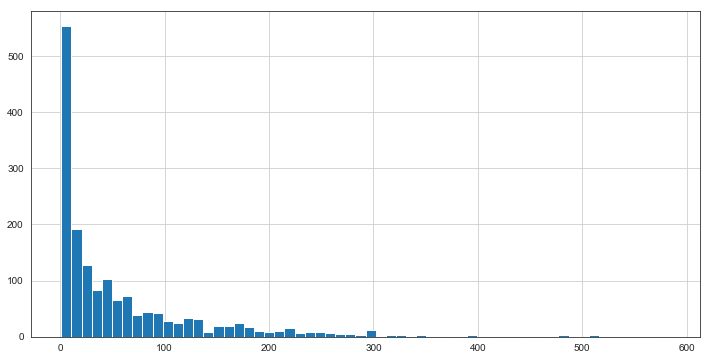

In [11]:
plt.figure(figsize=(12,6))
ratings['num of ratings'].hist(bins=60)

__The ratings histogram:__

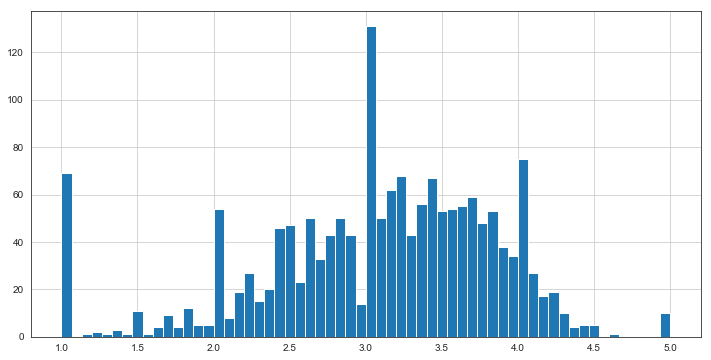

In [12]:
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=60)

__A jointplot of the 'rating' and 'num of ratings':__

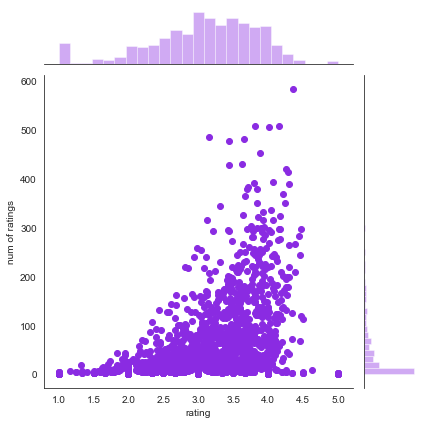

In [13]:
sns.jointplot('rating', 'num of ratings', data=ratings, color='blueviolet')

An increase in the number of ratings is likely to bring about a higher rating

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [14]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [15]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [16]:
ratings.sort_values('num of ratings', ascending=False).head(6)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [17]:
ratings.head(4)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125


Now let's grab the user ratings for those two movies:

In [18]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head(3)

user_id
0    5.0
1    5.0
2    5.0
Name: Star Wars (1977), dtype: float64

In [19]:
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']
liarliar_user_ratings.head(3)

user_id
0    NaN
1    NaN
2    1.0
Name: Liar Liar (1997), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

Basically, __<font color=red>*.corr()*</font>__ is used to compute pairwise correlation of columns of a DataFrame while __<font color=red>*.corrwith()*</font>__ is used to compute pairwise correlation of rows or columns of a DataFrame with rows or columns of a Series or another Dataframe.

In [21]:
movie_matrix.corrwith(starwars_user_ratings).head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [22]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

In [23]:
movie_matrix.corrwith(liarliar_user_ratings).head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [24]:
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)

__Let's clean this by removing NaN values and using a DataFrame instead of a series:__

<font color=#93291E>__Starwars:__</font>

In [25]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [26]:
corr_starwars.sort_values('correlation', ascending=False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. All these movies do not actually have a perfect correlation with 'Starwars'. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

__Let's fix this by filtering out movies that have less than 100 reviews__ (this value was chosen based off the histogram from earlier).

In [27]:
# .join is used instead of .merge because 'title' is the index of the DataFrame
corr_starwars_filtered = corr_starwars.join(ratings['num of ratings'])
corr_starwars_filtered.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [28]:
corr_starwars_filtered = corr_starwars_filtered[corr_starwars_filtered['num of ratings']>100].sort_values('correlation', ascending=False)
corr_starwars_filtered.head()

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


<font color=#f12711>**We now have the movie titles with ratings > 100 and with a correlation to Starwars**</font>

Without further ado, let's get the movie titles with correlation for the comedy Liar Liar:

<font color=#6f0000>__Liar Liar:__</font>

In [29]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head()

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [30]:
corr_liarliar.sort_values('correlation', ascending=False).head(10)

,correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


For the same reason as Starwars, the above isn't a great way of knowing if the listed movies actually have a correlation with Liar Liar

**Let's fix this by filtering out movies that have less than 100 reviews (this value was also chosen based off the histogram from earlier).**

In [31]:
corr_liarliar_filtered = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar_filtered.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [32]:
corr_liarliar_filtered = corr_liarliar_filtered[corr_liarliar_filtered['num of ratings']>100].sort_values('correlation', ascending=False)
corr_liarliar_filtered.head()

,correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


<font color=#DC281E>**We now have the movie titles with ratings > 100 and with a correlation to Starwars**</font>

# Great Job!